In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from scipy.interpolate import griddata
import time
from datetime import date

sys.path.append('/home/ollie/loziel/pyfesom2/SkillMetrics')
import skill_metrics as sm
import cartopy.crs as ccrs
import pickle

sys.path.append('/home/ollie/loziel/pyfesom2/')
import pyfesom2 as pf
import matplotlib.cm as cm
import cmocean.cm as cmo

In [2]:
var = 'DetSi'

In [3]:
# run paths -------------------------------------------------------------------------------------
## you can use an automatic incrementation of result paths below

if True:
    base_resultpath = '/work/ollie/loziel/model_output/fesom2.1_recom/B'
    run_names=['02','03','04','05','06','07','08','09']
    number_of_runs = np.size(run_names)

    resultpath = [None] * number_of_runs
    for i in range(0,number_of_runs):
        resultpath[i] = base_resultpath+run_names[i]

## Or alternatively you can enter the result paths mannually here

if False:
    resultpath = ['/work/ollie/loziel/model_output/fesom2.1_recom/B_spinup_riv/',
    '/work/ollie/ogurses/output_f2r2/spinup_1800_1850/deg_dia_02_deg_phy_02_agg/']
    run_names=['prespinup riv','prespinup']
    number_of_runs = np.size(run_names)

# Choose number of columns you want in the plot
number_of_columns = 2
number_of_lines = int(number_of_runs / number_of_columns)

# Choose figure size
figure_size = (15,15)

In [4]:
# export of analysis ------------------------------------------------------------------------------------
today = date.today().strftime("_%Y_%m_%d")

savepath = '/home/ollie/loziel/pyfesom2/outputs/B0112/'
htmlname     =  'comparison_DSi_' + today +'.html'
htmlpath = '/home/ollie/loziel/pyfesom2/outputs/B0112/'
export_html = False

meshpath = '/work/ollie/loziel/mesh/core2_meanz'

# period of analysis ------------------------------------------------------------------------------------

first_year = 1958
last_year  = 1968

years = np.arange(first_year,last_year+1,1)

# just to check
print('Processing years {4} to {5}\n\nReading out of {0}\nStoring graphs to {1}\nStoring html to {2} as {3}'.format(
    resultpath, savepath, htmlpath, htmlname,years[0],years[1]))

Processing years 1958 to 1959

Reading out of ['/work/ollie/loziel/model_output/fesom2.1_recom/B02', '/work/ollie/loziel/model_output/fesom2.1_recom/B03', '/work/ollie/loziel/model_output/fesom2.1_recom/B04', '/work/ollie/loziel/model_output/fesom2.1_recom/B05', '/work/ollie/loziel/model_output/fesom2.1_recom/B06', '/work/ollie/loziel/model_output/fesom2.1_recom/B07', '/work/ollie/loziel/model_output/fesom2.1_recom/B08', '/work/ollie/loziel/model_output/fesom2.1_recom/B09']
Storing graphs to /home/ollie/loziel/pyfesom2/outputs/B0112/
Storing html to /home/ollie/loziel/pyfesom2/outputs/B0112/ as comparison_DSi__2021_07_27.html


In [5]:
# years as array for x axis
xyears = range(first_year, last_year+1)

# mesh initialization 
mesh = pf.load_mesh(meshpath)

/work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2


# Load FESOM2 data

In [22]:
# check variables
NCfesom = resultpath[0] + '/DetSi.fesom.1850.nc'
!ncdump -h $NCfesom

ncdump: /work/ollie/loziel/model_output/fesom2.1_recom/B02/DetSi.fesom.1850.nc: /work/ollie/loziel/model_output/fesom2.1_recom/B02/DetSi.fesom.1850.nc: No such file or directory


In [23]:
labelfesom = 'FESOM DetSi'
unitfesom = 'DetSi [mmol m$^{-3}$]' # equals to mumol/L

In [38]:
# create list of variables
DetSifesom_0m_list = [None] * number_of_runs
DetSifesom_200m_list = [None] * number_of_runs
DetSifesom_2000m_list = [None] * number_of_runs
for i in range(0,number_of_runs):
    DetSifesom_0m_list[i] = 'DetSifesom_0m_'+run_names[i]
    DetSifesom_200m_list[i] = 'DetSifesom_200m_'+run_names[i]
    DetSifesom_2000m_list[i] = 'DetSifesom_2000m_'+run_names[i]
    
print('variables are: ',DetSifesom_0m_list, DetSifesom_200m_list, DetSifesom_2000m_list)

# load data, idetz2si
for i in range(0,number_of_runs):
    DetSifesom_0m_list[i] = pf.get_data(resultpath[i], "DetSi", years, mesh, how="mean", compute=True, runid='fesom', depth = 0)+pf.get_data(resultpath[i], "idetz2si", years, mesh, how="mean", compute=True, runid='fesom', depth = 0)
    DetSifesom_200m_list[i] = pf.get_data(resultpath[i], "DetSi", years, mesh, how="mean", compute=True, runid='fesom', depth = 200)+pf.get_data(resultpath[i], "idetz2si", years, mesh, how="mean", compute=True, runid='fesom', depth = 200)
    DetSifesom_2000m_list[i] = pf.get_data(resultpath[i], "DetSi", years, mesh, how="mean", compute=True, runid='fesom', depth = 2000)+pf.get_data(resultpath[i], "idetz2si", years, mesh, how="mean", compute=True, runid='fesom', depth = 2000)

variables are:  ['DetSifesom_0m_02', 'DetSifesom_0m_03', 'DetSifesom_0m_04', 'DetSifesom_0m_05', 'DetSifesom_0m_06', 'DetSifesom_0m_07', 'DetSifesom_0m_08', 'DetSifesom_0m_09'] ['DetSifesom_200m_02', 'DetSifesom_200m_03', 'DetSifesom_200m_04', 'DetSifesom_200m_05', 'DetSifesom_200m_06', 'DetSifesom_200m_07', 'DetSifesom_200m_08', 'DetSifesom_200m_09'] ['DetSifesom_2000m_02', 'DetSifesom_2000m_03', 'DetSifesom_2000m_04', 'DetSifesom_2000m_05', 'DetSifesom_2000m_06', 'DetSifesom_2000m_07', 'DetSifesom_2000m_08', 'DetSifesom_2000m_09']
Model depth: 0.0
Model depth: 0.0
Model depth: 190.0
Model depth: 190.0
Model depth: 1920.0
Model depth: 1920.0
Model depth: 0.0
Model depth: 0.0
Model depth: 190.0
Model depth: 190.0
Model depth: 1920.0
Model depth: 1920.0
Model depth: 0.0
Model depth: 0.0
Model depth: 190.0
Model depth: 190.0
Model depth: 1920.0
Model depth: 1920.0
Model depth: 0.0
Model depth: 0.0
Model depth: 190.0
Model depth: 190.0
Model depth: 1920.0
Model depth: 1920.0
Model depth: 

array([<GeoAxesSubplot:title={'center':'02'}>,
       <GeoAxesSubplot:title={'center':'03'}>,
       <GeoAxesSubplot:title={'center':'04'}>,
       <GeoAxesSubplot:title={'center':'05'}>,
       <GeoAxesSubplot:title={'center':'06'}>,
       <GeoAxesSubplot:title={'center':'07'}>,
       <GeoAxesSubplot:title={'center':'08'}>,
       <GeoAxesSubplot:title={'center':'09'}>], dtype=object)

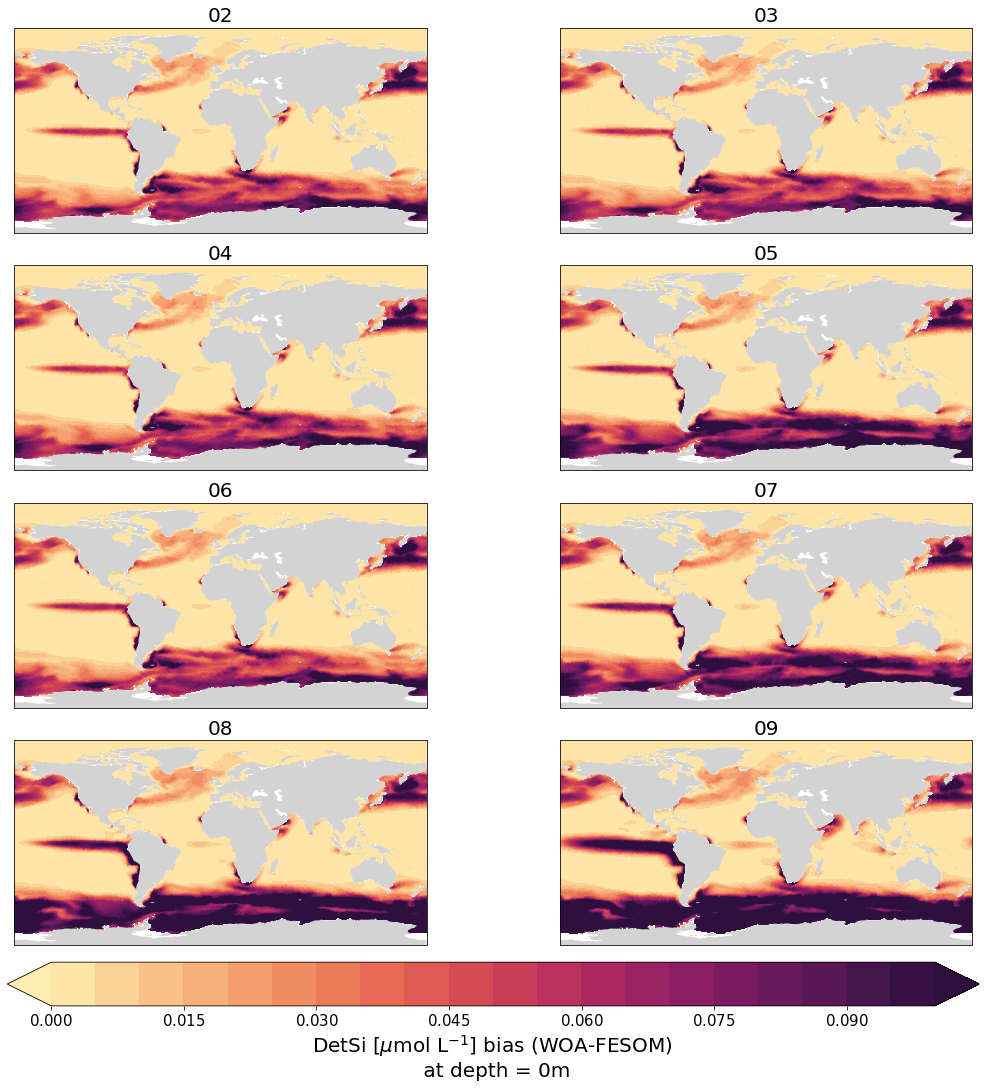

In [39]:
# apply sea mask to WOA as in FESOM ----------------------------------------------------------------------------------
# assumption: there is no ocean where value in FESOM == 0
dsi_int_ma = np.copy(dsi_int)
dsi_int_ma[DSifesom_0m_list[0] == 0] = 0

ind_depth = int(np.argmin(np.abs(mesh.zlev + 0)))

data = []
for i in range(0,number_of_runs):
    data.append(DetSifesom_0m_list[i])
    
# np.shape(data)

pf.plot(mesh, 
        data,
        levels=(0,.1,21),
        units=unitwoa+ ' bias (WOA-FESOM) \n at depth = 0m',
        titles = run_names,
        rowscol=[number_of_lines,number_of_columns],
        figsize=figure_size,
        cmap=cmo.matter,
       )

array([<GeoAxesSubplot:title={'center':'02'}>,
       <GeoAxesSubplot:title={'center':'03'}>,
       <GeoAxesSubplot:title={'center':'04'}>,
       <GeoAxesSubplot:title={'center':'05'}>,
       <GeoAxesSubplot:title={'center':'06'}>,
       <GeoAxesSubplot:title={'center':'07'}>,
       <GeoAxesSubplot:title={'center':'08'}>,
       <GeoAxesSubplot:title={'center':'09'}>], dtype=object)

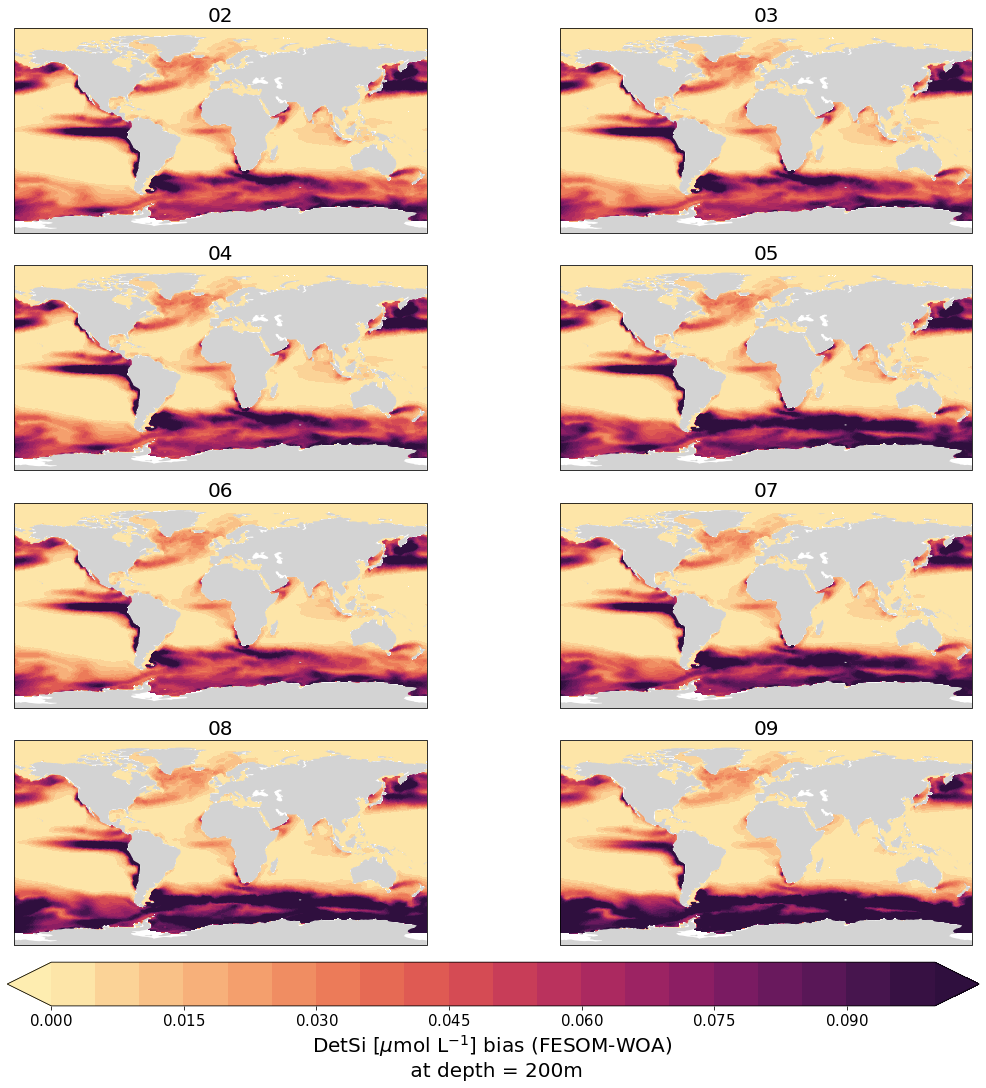

In [40]:
# apply sea mask to WOA as in FESOM ----------------------------------------------------------------------------------
# assumption: there is no ocean where value in FESOM == 0
dsi_int_ma = np.copy(dsi_int)
dsi_int_ma[DSifesom_200m_list[0] == 0] = 0

ind_depth = int(np.argmin(np.abs(mesh.zlev + 200)))

data = []
for i in range(0,number_of_runs):
    data.append(DSifesom_200m_list[i])
    
# np.shape(data)

pf.plot(mesh, 
        data,
        levels=(0,.1,21),
        units=unitwoa+ ' bias (FESOM-WOA) \n at depth = 200m',
        titles = run_names,
        rowscol=[number_of_lines,number_of_columns],
        figsize=figure_size,
        cmap=cmo.matter,
       )

array([<GeoAxesSubplot:title={'center':'02'}>,
       <GeoAxesSubplot:title={'center':'03'}>,
       <GeoAxesSubplot:title={'center':'04'}>,
       <GeoAxesSubplot:title={'center':'05'}>,
       <GeoAxesSubplot:title={'center':'06'}>,
       <GeoAxesSubplot:title={'center':'07'}>,
       <GeoAxesSubplot:title={'center':'08'}>,
       <GeoAxesSubplot:title={'center':'09'}>], dtype=object)

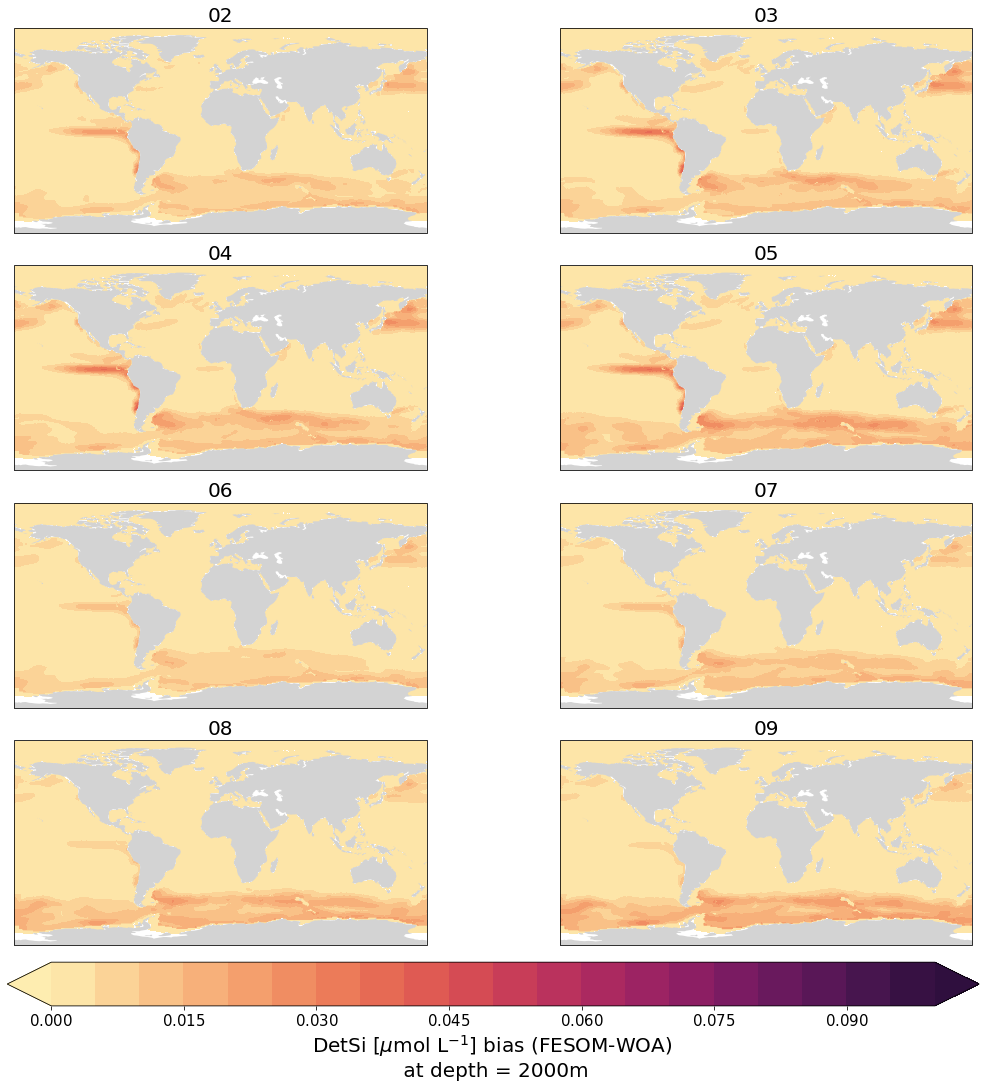

In [41]:
# apply sea mask to WOA as in FESOM ----------------------------------------------------------------------------------
# assumption: there is no ocean where value in FESOM == 0
dsi_int_ma = np.copy(dsi_int)
dsi_int_ma[DSifesom_2000m_list[0] == 0] = 0

ind_depth = int(np.argmin(np.abs(mesh.zlev + 2000)))

data = []
for i in range(0,number_of_runs):
    data.append(DSifesom_2000m_list[i])
    
# np.shape(data)

pf.plot(mesh, 
        data,
        levels=(0,.1,21),
        units=unitwoa+ ' bias (FESOM-WOA) \n at depth = 2000m',
        titles = run_names,
        rowscol=[number_of_lines,number_of_columns],
        figsize=figure_size,
        cmap=cmo.matter,
       )

[<GeoAxesSubplot:>]

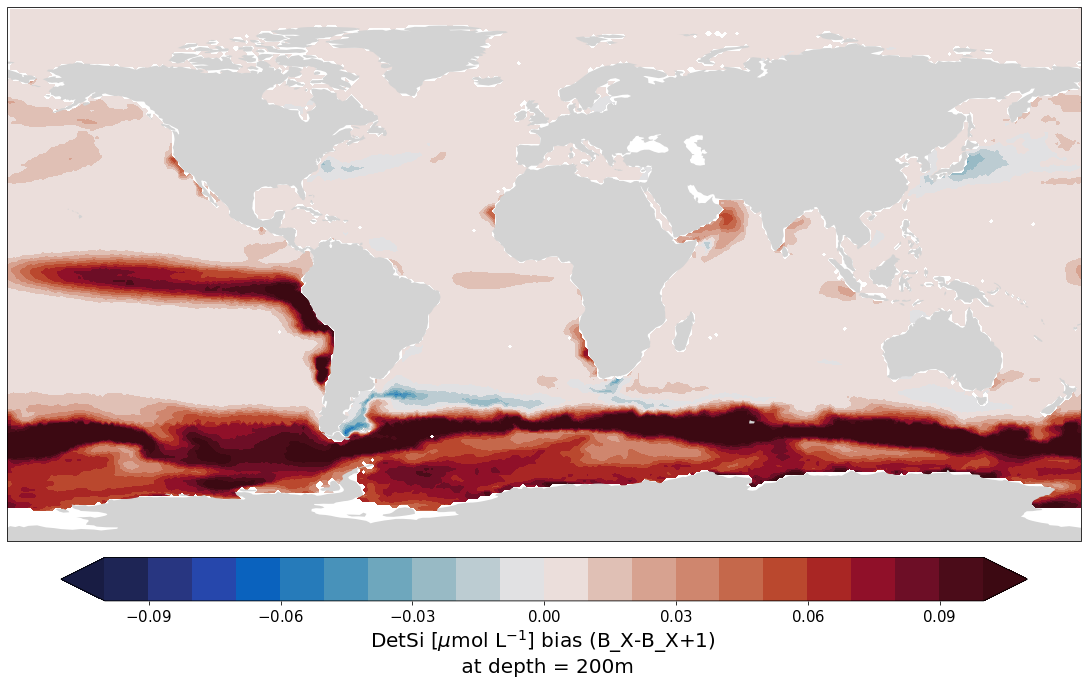

In [42]:
# apply sea mask to WOA as in FESOM ----------------------------------------------------------------------------------
# assumption: there is no ocean where value in FESOM == 0
dsi_int_ma = np.copy(dsi_int)
dsi_int_ma[DSifesom_200m_list[0] == 0] = 0

ind_depth = int(np.argmin(np.abs(mesh.zlev + 200)))

data = DetSifesom_0m_list[7]-DetSifesom_0m_list[0]
    
# np.shape(data)

pf.plot(mesh, 
        data,
        levels=(-.1,.1,21),
        units=unitwoa+ ' bias (B_X-B_X+1) \n at depth = 200m',
        rowscol=[1,1],
        figsize=figure_size,
        cmap=cmo.balance,
       )

[<GeoAxesSubplot:>]

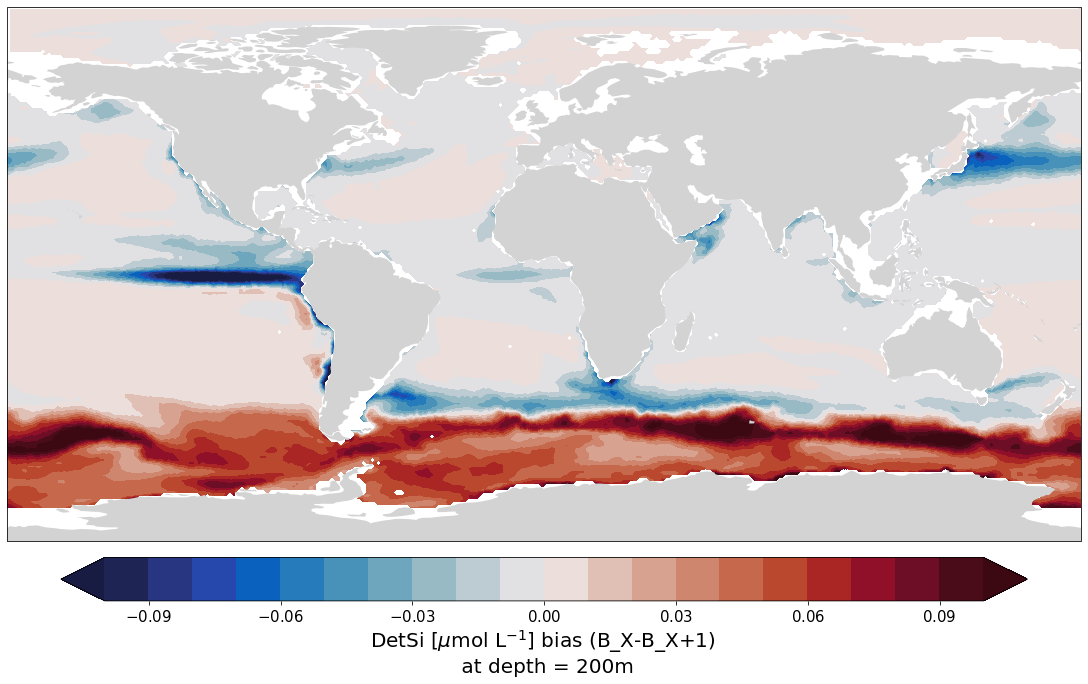

In [46]:
# apply sea mask to WOA as in FESOM ----------------------------------------------------------------------------------
# assumption: there is no ocean where value in FESOM == 0
dsi_int_ma = np.copy(dsi_int)
dsi_int_ma[DSifesom_2000m_list[0] == 0] = 0

ind_depth = int(np.argmin(np.abs(mesh.zlev + 200)))

data = []

data.append(DetSifesom_200m_list[7]-DetSifesom_200m_list[2])
    
# np.shape(data)

pf.plot(mesh, 
        data,
        levels=(-.1,.1,21),
        units=unitwoa+ ' bias (B_X-B_X+1) \n at depth = 200m',
        rowscol=[1,1],
        figsize=figure_size,
        cmap=cmo.balance,
       )